<a href="https://colab.research.google.com/github/AhmedCoolProjects/ML/blob/main/Simple_Linear_NonLinear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building Model that predict if a cell is Bengin or Malignant based on a sample of data.
> ML: is the subfield of computer science that gives computers the ability to learn without being explicitly programmed.
* Regression/Estmation: predicting continuous values.
* Classification: predicting the class/category of an item.
* Clustering: Finding the structure of data / summarization.
* Associations: associating frequent co-occuring items.
* Anomaly Detection: discovering abnormal and unusual cases.
* Squence Mining: predicting next event, (Markov Model, HMM).
* Dimension Reduction: reduce size of data (PCA).
* Recommandation System: recommanding items.

* AI: make computers intelligent.
* ML: statistical part of AI.
* DL: computer can learn and make decision in their own.

Modules:
* Numpy: math library with undimentional arrays.
* SciPy: computation.
* matplotlib.
* Pnadas.
* scikitLearn: free machine learning library.classification, regression,clustering.

* Supervised: labeled data. attributes(featurs) => labels.
Classification & Regrission.
* Unsupervised: discover information. unlabeled data. Dimension reduction, density estimation, market basket analysis, clustering...

* Regression variables:
1. Dependent variable **Y**: state, target, final goal.
2. Independent variable **X**: causes.
> f(X) = Y
* Simple Regression (linear or non-linear with 1 independent variable) y = ax + b; a: slope ,b: intercept .
* Multiple Regression (linear or non-linear with more than 1 independent variable).
> sales forecasting.
> satisfaction analysis.
> price estimation.
> employement income.




**Error**: the distance from the data point to the fitted regression line.

**The Mean** of the errors shows how poorly the line fits with the whole dataset.

**MSE**: **M**ean **S**quared **E**rror:

1/n . Sigma(1,n)(yi - **yi**)^2




1. Train-Test in the same dataset:
* hight training accuracy: percentage of correct predictions of the model makes when using testing data. not necessarily good. result of over-fitting. over-fit(the model is overly trained to the dataset, which may capture noise and produce a non-generalized model).
* Low Out-of-sample accuracy: percentage of correct predictions of the model makes when using data that the model hasn't been trained on.
> Purpose: imporve Out-of-sample accurcy.
2. Train/Test split evaluation approach:
portion for training and the rest for testing.
3. K-fold cross-validation: divise into folds. 1 fold for testing and the rest for training.
> accuracy = avg of the all cases accuracies.



**Non-Linear Regression**: when the data shows a curevy trends. **y = b + ax^r**.
> Linear Regression.
> Quadratic(Parabolic) Regression.
> Cubic regression...
=> **Polynomial Regression**: fits a curve line in the data with degrees.
=> Polynomieal regression model can be transformed into linear regression model (x1 = x, x2= x^2, x3= x^3,...).

#Linear Regression(Simple)
## Predicting CO2 Emmission of a car.

In [44]:
# getting data
!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv

--2021-07-08 11:37:58--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2021-07-08 11:37:58 (1.95 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

In [46]:
df = pd.read_csv('/content/FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [48]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELTYPE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,Z,8.5,196
1,2.4,4,Z,9.6,221
2,1.5,4,Z,5.9,136
3,3.5,6,Z,11.1,255
4,3.5,6,Z,10.6,244


In [49]:
viz = cdf.drop('FUELTYPE',axis=1)
viz.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


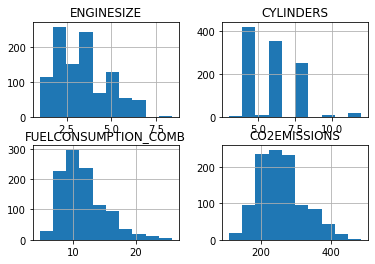

In [50]:
viz.hist()
plt.show()

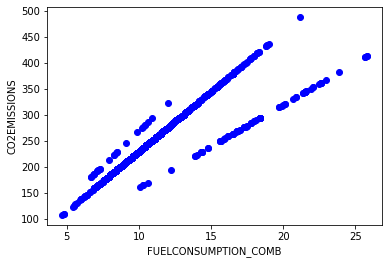

In [51]:
# Lets see how linear is the relation between the CO2Emmissions and the other independent features.
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

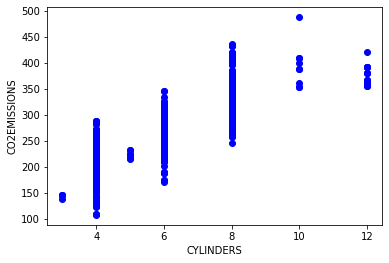

In [52]:
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

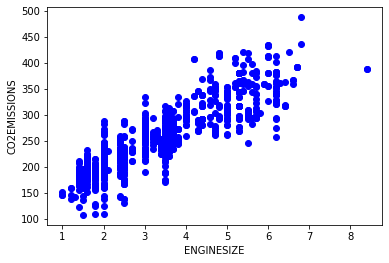

In [53]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [54]:
# lets build a model that can 
# creating training and testing datasets.
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [55]:
# scikitlearn
from sklearn import linear_model

In [56]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
regr.coef_

array([[39.01831868]])

In [58]:
regr.intercept_

array([126.78847079])

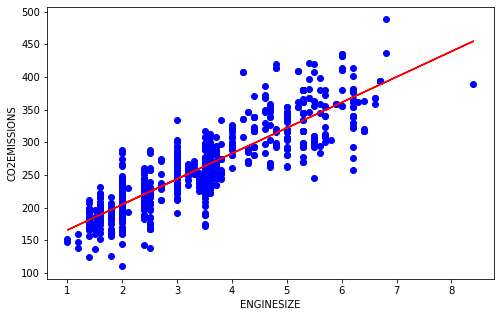

In [59]:
plt.figure(figsize=(8,5))
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='blue')
plt.plot(train_x,train_x*regr.coef_[0][0]+regr.intercept_[0],'-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [60]:
# model evaluation
from sklearn.metrics import r2_score

In [61]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_pre = regr.predict(test_x)
print('MAE: %.2f' % np.mean(np.absolute(test_y_pre - test_y)))
print('MSE : %.2f' % np.mean((test_y_pre - test_y)**2))
print('R2-score : %.2f' % r2_score(test_y_pre,test_y))

MAE: 24.48
MSE : 1044.65
R2-score : 0.66


#Non-Linear Regression(Simple)
## predicting China's GDP on data between 1960-2014.

In [62]:
# downloading the dataset
!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/china_gdp.csv

2021-07-08 11:38:01 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-Coursera/labs/Data_files/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


In [63]:
df = pd.read_csv('/content/china_gdp.csv')
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


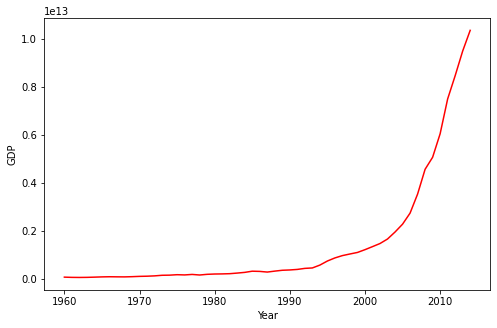

In [64]:
plt.figure(figsize=(8,5))
plt.plot(df.Year,df.Value,color='red')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

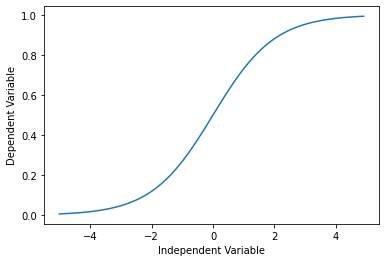

In [65]:
# exp of logistic function
x = np.arange(-5,5,0.1)
y = 1 / (1+ np.exp(-x))
plt.plot(x,y)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

In [66]:
def sigmoid(x,beta1,beta2):
  y = 1 / (1 + np.exp(-beta1*(x-beta2)))
  return y

In [67]:
# normalizing our data
xdata = df.Year/max(df.Year)
ydata = df.Value/max(df.Value)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    55 non-null     int64  
 1   Value   55 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1008.0 bytes


In [68]:
from scipy.optimize import curve_fit
popt,pcov  = curve_fit(sigmoid,xdata,ydata)
print('beta1 = %f, beta2 = %f' % (popt[0],popt[1]))

beta1 = 690.453017, beta2 = 0.997207


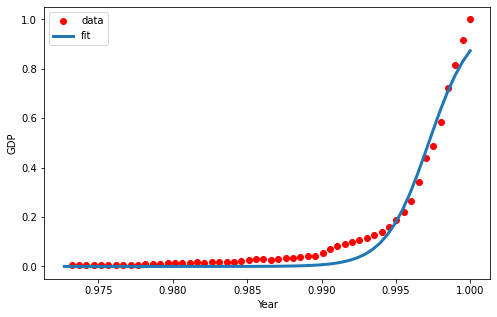

In [69]:
x = np.linspace(1960,2015,55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x,*popt)
plt.plot(xdata,ydata,'ro',label='data')
plt.plot(x,y,linewidth=3.0,label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [70]:
# accuracy train-test in same dataset.
from sklearn.metrics import r2_score
print('MAE : %.2f' % np.mean(np.absolute(ydata - y)))
print('MSE : %.2f' % np.mean((ydata - y)**2))
print('R2 : %.2f' % r2_score(ydata,y))


MAE : 0.03
MSE : 0.00
R2 : 0.97


In [71]:
#train-test split dataset.
msk = np.random.rand(len(df)) < 0.8
x_training = xdata[msk]
y_training = ydata[msk]
x_testing = xdata[~msk]
y_testing = ydata[~msk]
# train the model
popt,pcov = curve_fit(sigmoid,x_training,y_training)
print(*popt)

720.256040938575 0.9972113270243567


In [72]:
# evaluation
y_testing_prediction = sigmoid(x_testing,*popt)
print('MAE : %.2f' % np.mean(np.absolute(y_testing - y_testing_prediction)))
print('MSE : %.2f' % np.mean((y_testing_prediction - y_testing)**2))
print('R2-score : %.2f' % r2_score(y_testing,y_testing_prediction))

MAE : 0.03
MSE : 0.00
R2-score : 0.92
